# Portfolio Optimization

Haiyang Yu, 04/13/2018

Contents:
+ Foundamental concepts
+ Markowitz Modern Portfolio Theory
+ Factor model
+ Expectation-Maximization (EM) algorithm
+ Rejection sampling method
+ Random walk Monte Carlo sampling method


## Foundamental concepts

- **Rate of Return**
    - In finance, return is a profit on an investment. Rate of return is a profit on an investment over a period of time, expressed as a proportion of the original investment. The time period is typically a year, in which case the rate of return is referred to as annual return. To compare returns over time periods of different lengths on an equal basis, it is useful to convert each return into an annualised return. This conversion process is called **annualisation**.

    $$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}} $$
    
    - Annualisation:
        + Without any reinvestment, a return $R$ over a period of length $t$ (unit: year) is equivalent to a rate of annual return: $r=R/t$
        + If the reinvestment is considerred, due to the effect of compounding, the relationship between a rate of return $r$, and a return $R$ over a length of time $t$ is: $(1+R) = (1+r)^t$

    - log-return: 
        + logarithmic return from initial value ($V_i$) to the future value ($V_f$): $\ln(V_f/V_i)$
        + logarithmic rate of return: $r_{log} = \ln(V_f/V_i)/t$
        + Asset growth equation: $V_f = V_i e^{rt}$

    - Internal Rate of Return (IRR): 
        + The rate of return which makes the net present value (NPV) of cash flows zero. 
        + It is a solution $r$ satisfying the following equation:
            $$ NPV = \sum_{t=0}^{n} \frac{C_t}{(1+r)^t} $$
        + Example: An investment is given by the sequence of cash flows, IRR should be 5.96%. 
            
Year (t)  |  Cash flow ($C_t$)
----------|-------------------
0 |  -123400
1 |  36200
2 |  54800
3 |  48100


- **Risk**
    + The Golden Law of finance: high returns are often associated with high risks.
    + Risks are the uncertainties of returns, like the error bars of measurements.
    + Volatility:
        - In finance, volatility (symbol σ) is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.
        - Historic volatility is derived from time series of past market prices. An implied volatility is derived from the market price of a market traded derivative (in particular an option).
        - For a financial instrument whose price follows a Gaussian random walk, or Wiener process, the width of the distribution increases as time increases. This is because there is an increasing probability that the instrument's price will be farther away from the initial price as time increases. However, rather than increase linearly, the volatility increases with the square-root of time as time increases, because some fluctuations are expected to cancel each other out, so the most likely deviation after twice the time will not be twice the distance from zero.
        - Since observed price changes do not follow Gaussian distributions, others such as the Lévy distribution are often used. These can capture attributes such as "fat tails". Volatility is a statistical measure of dispersion around the average of any random variable such as market parameters etc.
        - Much research has been devoted to modeling and forecasting the volatility of financial returns, and yet few theoretical models explain how volatility comes to exist in the first place.
        - Volatility is not always the bad thing; sometimes it can bring profits (e.g. trading volatility).

- **Risk Free Rate**

- **Market Neutral**


In [1]:
# Internal Rate of Return
import numpy as np
np.irr([-123400, 36200, 54800, 48100])

0.0596163785673296

In [ ]:
# Gaussian random walk (Wiener process)


In [ ]:
# A simple trading model on volatility


## Markowitz Modern Portfolio Theory



In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

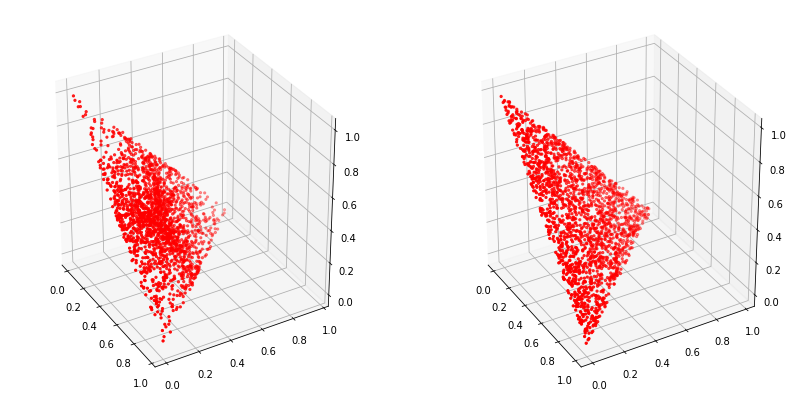

In [86]:
def sampling_weight(nx=3, nsp=10, flag=1):
    # uniform distributed samping with constrain: sum(x) = 1
    # nx: number of random variables
    # nsp: number of sampling points
    
    if flag==0:
        # Naive normalized method: NOT uniformly distributed on the simplex
        p = np.random.uniform(low=0, high=1, size=nx*nsp).reshape(nsp, nx)
        p = p / np.sum(p, axis=1).reshape(nsp,1)

    if flag==1:
        # Symmetric Dirichlet distribution: uniformly distributed on the simplex
        p = np.random.exponential(scale=1, size=nx*nsp).reshape(nsp, nx)
        p = p / np.sum(p, axis=1).reshape(nsp,1)
        
    return p 

plt.figure(1, figsize=(14,7))
for i in range(2):
    ax = plt.subplot(1,2,i+1, projection='3d')
    p = sampling_weight(nx=3, nsp=2000, flag=i)
    ax.scatter(p[:,0], p[:,1], p[:,2], c='r', s=20, marker='.')
    ax.view_init(30, -30)

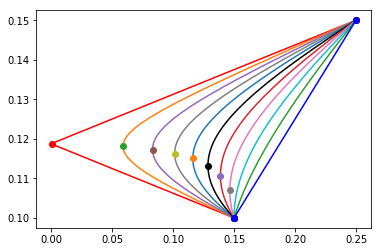

In [135]:
def plot_2s(r=[0.1, 0.15], s=[0.28, 0.24], cor=-0.1, cstr='r', lstr='-', 
            w=np.array([np.linspace(1,0,100), np.linspace(0,1,100)])):
    pr = np.dot(np.array(r).reshape([1,2]), w)[0]
    cormat = np.array([[s[0]*s[0], cor*s[0]*s[1]], [cor*s[0]*s[1], s[1]*s[1]]])
    ps = np.sqrt( np.sum(w * np.dot(cormat, w), axis=0) )
    plt.plot(s, r, cstr+'o')
    plt.plot(ps, pr, cstr+lstr)
    return pr, ps

for cor in np.linspace(-1,1,11):
    cstr = ''
    if np.abs(cor+1) < 1e-6: cstr='r'
    if np.abs(cor-1) < 1e-6: cstr='b'
    if np.abs(cor-0) < 1e-6: cstr='k'
    pr, ps = plot_2s(r=[0.1, 0.15], s=[0.15, 0.25], cor=cor, cstr=cstr)
    imins = np.argmin(ps)
    plt.plot(ps[imins], pr[imins], cstr+'o')


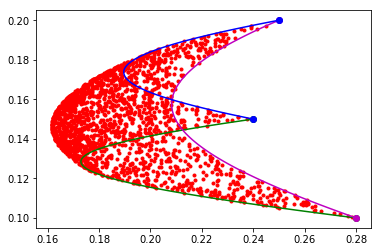

In [146]:
def plot_ms(r, s, cor, w, cstr='r'):
    cormat = cor * np.dot(s.T, s)
    pr = np.dot(r, w.T)[0]
    ps = np.sqrt( np.sum(w.T * np.dot(cormat, w.T), axis=0) )
    plt.plot(ps, pr, cstr+'.')
    return pr, ps

r = np.array([0.1, 0.15, 0.2]).reshape([1,3])
s = np.array([0.28, 0.24, 0.25]).reshape([1,3])
cor = np.array([[1, -0.1, 0.25], 
                [-0.1, 1, 0.20], 
                [0.25, 0.20, 1]])
w = sampling_weight(nx=3, nsp=2000, flag=1)

pr, ps = plot_ms(r=r, s=s, cor=cor, w=w)
i=0; j=1; pr, ps = plot_2s(r=[r[0,i], r[0,j]], s=[s[0,i], s[0,j]], cor=cor[i,j], cstr='g')
i=0; j=2; pr, ps = plot_2s(r=[r[0,i], r[0,j]], s=[s[0,i], s[0,j]], cor=cor[i,j], cstr='m')
i=1; j=2; pr, ps = plot_2s(r=[r[0,i], r[0,j]], s=[s[0,i], s[0,j]], cor=cor[i,j], cstr='b')
